In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib
import matplotlib.lines as mlines
import pickle as pk

In [88]:
dataset = 'svhn'
boo_name = 'BoostedNet'
w_name = 'L2W-DEN'
our_name = 'ConfEE'

if dataset == 'cifar10':
    model = 't2t_7'
    long_name = 't2t_vit_7'
    total_mudaa = 13.4
    end_acc = 94.5
    lambda_val_1 = 0.1
    lambda_val_2 = 0.9
    end_plot_acc = 0.85*end_acc
    line_acc = end_acc*0.9
    line_acc_label =r'$90\%$ of end accuracy'
    L=7
elif dataset == 'cifar100':
    model = 't2t_14'
    long_name = 't2t_vit_14'
    total_mudaa = 56
    end_acc = 88.4
    L=14
    lambda_val_1 = 0.1
    lambda_val_2 = 0.9
    end_plot_acc = 0.4*end_acc
    line_acc = end_acc*0.7
    line_acc_label =r'$70\%$ of end accuracy'
elif dataset == 'svhn':
    L=7
    end_plot_acc = 0.2*end_acc
    line_acc = end_acc*0.9
    line_acc_label =r'$90\%$ of end accuracy'
    model = 't2t_7'
    long_name = 't2t_vit_7'
    total_mudaa = 4.3
    end_acc = 93
    lambda_val_1 = 0.1
    lambda_val_2 = 0.6

In [89]:
with open(dataset+'_'+model+'/'+long_name+'_boosted_'+dataset+'_results.pk', 'rb') as file:
        list_dict_boosted = pk.load(file)
        
with open(dataset+'_'+model+'/'+long_name+'_weighted_'+dataset+'_results.pk', 'rb') as file:
        list_dict_weighted = pk.load(file)
# with open(dataset+'_'+model+'/'+long_name+'_baseline_'+dataset+'_results.pk', 'rb') as file:
#         list_dict_baseline = pk.load(file)

In [90]:
path = dataset+'_'+model+'/'
list_files = os.listdir(path)

list_dicts_ours = []
for file_name in list_files:
   
    if '.pk' in file_name and 'baseline' not in file_name and 'boosted' not in file_name and 'weighted' not in file_name:
        lambda_val = float(file_name.split('_')[-2])
        print(file_name)
        with open(os.path.join(path, file_name), 'rb') as file:
            dicts = pk.load(file)
        dicts['lambda'] = lambda_val
        list_dicts_ours.append(dicts)
        print(lambda_val)
        if lambda_val == lambda_val_1:
            our_point_to_display = dicts
            print('got point 1')
        if lambda_val == lambda_val_2:
            our_point2_to_display = dicts
            print('got point 2')

longer_svhn_svhn_0.1_results.pk
0.1
got point 1
longer_svhn_svhn_0.6_results.pk
0.6
got point 2


In [91]:
def extract_metrics_we_want(metrics_dict, keys_we_want):
    metrics_we_want = {}
    for key, val in metrics_dict.items():
        if key in keys_we_want:
            metrics_we_want[key] = val
    return metrics_we_want

def get_all_cov_C(metrics):
    cov_keys_dict = {}
    C_keys_dict = {}
    for key in metrics.keys():
        if 'emp_alpha' in key:
            tokens = key.split('emp_alpha')
            alpha = tokens[1]
            prefix = tokens[0]
            
            cov_key = prefix+'emp_alpha'+alpha
            C_key = prefix+'C'+alpha
            if prefix in cov_keys_dict:
                cov_keys_dict[prefix].append(cov_key)
                C_keys_dict[prefix].append(C_key)
            else:
                cov_keys_dict[prefix] = [cov_key] 
                C_keys_dict[prefix] = [C_key]  
    return cov_keys_dict, C_keys_dict

def get_all_key_with(metrics, substring):
    keys_with_substring = []
    for key in metrics.keys():
        if substring in key:
            keys_with_substring.append(key)
    return keys_with_substring

def find_highest_cov(metrics_we_care_about, cov_keys, requested_alpha):
    alpha_max = 0
    for cov_key in cov_keys:
            alpha_val = float(cov_key.split('_')[-1])
            emp_alpha = metrics_we_care_about['average'+cov_key]
            if emp_alpha< requested_alpha:
                if alpha_max < alpha_val:
                    alpha_max = alpha_val
                    #print('switching fot', alpha_val)
    #print('highest alpha is ', alpha_max, 'with emp cov', )
    return alpha_max
            

In [92]:
our_df = pd.DataFrame()
keys_we_want = ['test/acc_exit','test/total_cost', 'test/gated_acc', 'test/gated_ece', 'test/gated_ece']
cov_keys_dict, C_keys_dict = get_all_cov_C(list_dicts_ours[0])


type_of_conf = 'test/sets_gated_'
cov_keys = cov_keys_dict[type_of_conf]
C_keys = C_keys_dict[type_of_conf]
cov_keys_baseline = cov_keys
C_keys_baseline = C_keys
# cov_keys_baseline = [c.split('test/')[-1] for c in cov_keys] # dumb storing thing, have to remove the test/ fo rhte baseline
# C_keys_baseline = [c.split('test/')[-1] for c in C_keys] 

print(cov_keys)
print(cov_keys_baseline)
keys_we_want = keys_we_want + cov_keys + C_keys
keys_gated_accs = get_all_key_with(list_dicts_ours[-1], 'gated_acc_')
keys_all_acc = get_all_key_with(list_dicts_ours[-1], 'test/acc')




['test/sets_gated_emp_alpha_0.01', 'test/sets_gated_emp_alpha_0.015', 'test/sets_gated_emp_alpha_0.02', 'test/sets_gated_emp_alpha_0.025', 'test/sets_gated_emp_alpha_0.03', 'test/sets_gated_emp_alpha_0.035', 'test/sets_gated_emp_alpha_0.04', 'test/sets_gated_emp_alpha_0.045', 'test/sets_gated_emp_alpha_0.05']
['test/sets_gated_emp_alpha_0.01', 'test/sets_gated_emp_alpha_0.015', 'test/sets_gated_emp_alpha_0.02', 'test/sets_gated_emp_alpha_0.025', 'test/sets_gated_emp_alpha_0.03', 'test/sets_gated_emp_alpha_0.035', 'test/sets_gated_emp_alpha_0.04', 'test/sets_gated_emp_alpha_0.045', 'test/sets_gated_emp_alpha_0.05']


In [93]:
keys_we_want

['test/acc_exit',
 'test/total_cost',
 'test/gated_acc',
 'test/gated_ece',
 'test/gated_ece',
 'test/sets_gated_emp_alpha_0.01',
 'test/sets_gated_emp_alpha_0.015',
 'test/sets_gated_emp_alpha_0.02',
 'test/sets_gated_emp_alpha_0.025',
 'test/sets_gated_emp_alpha_0.03',
 'test/sets_gated_emp_alpha_0.035',
 'test/sets_gated_emp_alpha_0.04',
 'test/sets_gated_emp_alpha_0.045',
 'test/sets_gated_emp_alpha_0.05',
 'test/sets_gated_C_0.01',
 'test/sets_gated_C_0.015',
 'test/sets_gated_C_0.02',
 'test/sets_gated_C_0.025',
 'test/sets_gated_C_0.03',
 'test/sets_gated_C_0.035',
 'test/sets_gated_C_0.04',
 'test/sets_gated_C_0.045',
 'test/sets_gated_C_0.05']

In [94]:
requested_alpha = 0.05

In [95]:
our_df = pd.DataFrame()
for metrics in list_dicts_ours:
    metrics_we_care_about = extract_metrics_we_want(metrics, keys_we_want)
    metrics_we_care_about['average_IC'] = np.mean(metrics_we_care_about['test/total_cost'])/total_mudaa
    metrics_we_care_about['average_ACC'] = np.mean(metrics_we_care_about['test/gated_acc'])
    metrics_we_care_about['ACC'] = metrics_we_care_about['test/gated_acc'] 
    
    metrics_we_care_about['ECE'] =metrics_we_care_about['test/gated_ece'] 
    
    for cov_key in cov_keys:
        alpha = float(cov_key.split('alpha_')[-1])
        metrics_we_care_about['average'+cov_key] = np.mean(metrics_we_care_about[cov_key])
        
        metrics_we_care_about['alpha'+cov_key] = alpha
    for C_key in C_keys:
        metrics_we_care_about['average'+C_key] = np.mean(metrics_we_care_about[C_key])
        
    alpha_max = find_highest_cov(metrics_we_care_about, cov_keys, requested_alpha)
    
    
    if alpha_max >0 :
        C_key = type_of_conf+'C_'+str(alpha_max)
        
        metrics_we_care_about['C'] = metrics_we_care_about[C_key]
        metrics_we_care_about['emp_alpha'] = alpha_max
    
    df = pd.DataFrame(data=metrics_we_care_about)
    
    our_df = pd.concat([df, our_df],axis=0, ignore_index=True)
    
our_point_ic  = np.mean(our_point_to_display['test/total_cost'])
our_point_acc  = np.mean(our_point_to_display['test/gated_acc'])
our_point2_ic = np.mean(our_point2_to_display['test/total_cost'])
our_point2_acc  = np.mean(our_point2_to_display['test/gated_acc'])


In [96]:
def replace_if_closer(points,closest_to_points, val, this_point):
    for i, point in enumerate(points):
        dif_now = np.abs(val-point)
        #print(dif_now)
        dif_prev = closest_to_points[i][1]
        if dif_now< dif_prev:
            closest_to_points[i] = (this_point, dif_now)
    return closest_to_points
def collect_baseline_data(list_dict_baseline, points):
    baseline_df = pd.DataFrame()
    closest_to_points = [(None, 100) for _ in points]
    for metrics in list_dict_baseline:
        metrics['average_IC'] = np.mean(metrics['EXPECTED_FLOPS'])/total_mudaa
        metrics['average_ACC'] = np.mean(metrics['ACC'])
        ic = np.mean(metrics['EXPECTED_FLOPS'])
        
        closest_to_points = replace_if_closer(points,closest_to_points, ic, metrics)
#         for cov_key in cov_keys_baseline:
#             alpha = float(cov_key.split('alpha_')[-1])
#             metrics['average'+cov_key] = np.mean(metrics[cov_key])
#             metrics['alpha'+cov_key] = float(cov_key.split('_')[-1])
#         for C_key in C_keys_baseline:
#             metrics['average'+C_key] = np.mean(metrics[C_key])
#             print(np.mean(metrics_we_care_about[C_key]))
#         alpha_max = find_highest_cov(metrics, cov_keys_baseline, requested_alpha)
        
#         if alpha_max >0 :
#             C_key = type_of_conf+'C_'+str(alpha_max)
#             metrics['C'] = metrics[C_key]
#             metrics['emp_alpha'] = alpha_max
        df = pd.DataFrame(data=metrics)
        baseline_df = pd.concat([df, baseline_df],axis=0, ignore_index=True)
    return baseline_df, [tuple_points[0] for tuple_points in closest_to_points]


boosted_df, boosted_points = collect_baseline_data(list_dict_boosted, [our_point_ic, our_point2_ic])
boosted_df['method'] = boo_name
weighted_df, weighted_points = collect_baseline_data(list_dict_weighted, [our_point_ic, our_point2_ic])
weighted_df['method'] = w_name

# baseline_df, baseline_points = collect_baseline_data(list_dict_baseline, [our_point_ic, our_point2_ic])
# baseline_df['method'] = 'baseline'
# baseline_df['average_IC'] = baseline_df['average_IC']/1000000

/tmp/ipykernel_73503/2024982966.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  boosted_df['method'] = boo_name
/tmp/ipykernel_73503/2024982966.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  weighted_df['method'] = w_name


In [97]:
boosted_point_ic  = np.mean(boosted_points[0]['EXPECTED_FLOPS'])
boosted_point_acc  = np.mean(boosted_points[0]['ACC'])
boosted_point2_ic  = np.mean(boosted_points[1]['EXPECTED_FLOPS'])
boosted_point2_acc  = np.mean(boosted_points[1]['ACC'])

weighted_point_ic  = np.mean(weighted_points[0]['EXPECTED_FLOPS'])
weighted_point_acc  = np.mean(weighted_points[0]['ACC'])
weighted_point2_ic  = np.mean(weighted_points[1]['EXPECTED_FLOPS'])
weighted_point2_acc  = np.mean(weighted_points[1]['ACC'])

In [98]:
filtered_boosted_df = boosted_df[boosted_df['average_ACC'].between(end_plot_acc, end_acc)]
filtered_our_df = our_df[our_df['average_ACC'].between(end_plot_acc, end_acc)]
filtered_weighted_df = weighted_df[weighted_df['average_ACC'].between(end_plot_acc, end_acc)]
#filtered_baseline_df   = baseline_df[baseline_df['average_ACC'].between(end_plot_acc, end_acc)]

In [104]:
combined_df

,test/sets_0_C_0.01,test/sets_0_emp_alpha_0.01,test/sets_0_C_0.015,test/sets_0_emp_alpha_0.015,test/sets_0_C_0.02,test/sets_0_emp_alpha_0.02,test/sets_0_C_0.025,test/sets_0_emp_alpha_0.025,test/sets_0_C_0.03,test/sets_0_emp_alpha_0.03,...,averagetest/sets_gated_C_0.015,averagetest/sets_gated_C_0.02,averagetest/sets_gated_C_0.025,averagetest/sets_gated_C_0.03,averagetest/sets_gated_C_0.035,averagetest/sets_gated_C_0.04,averagetest/sets_gated_C_0.045,averagetest/sets_gated_C_0.05,C,emp_alpha
0,7.586021,0.006144,7.251920,0.011521,6.572965,0.019201,6.204301,0.025346,5.910906,0.028418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.606759,0.008449,7.261905,0.012289,6.627496,0.017665,6.226574,0.027650,5.937788,0.032258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.493855,0.007680,7.148233,0.010753,6.481567,0.016897,6.077573,0.023041,5.830261,0.029186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.591398,0.005376,7.252688,0.007680,6.617512,0.018433,6.217358,0.022273,5.917819,0.028418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.619816,0.007680,7.258832,0.007680,6.625960,0.013825,6.239631,0.016129,5.950077,0.019201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.421364,1.34645,1.317698,1.260509,1.206657,1.186434,1.163459,1.136024,1.312036,0.025
796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.421364,1.34645,1.317698,1.260509,1.206657,1.186434,1.163459,1.136024,1.313505,0.025
797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.421364,1.34645,1.317698,1.260509,1.206657,1.186434,1.163459,1.136024,1.311390,0.025
798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.421364,1.34645,1.317698,1.260509,1.206657,1.186434,1.163459,1.136024,1.310769,0.025


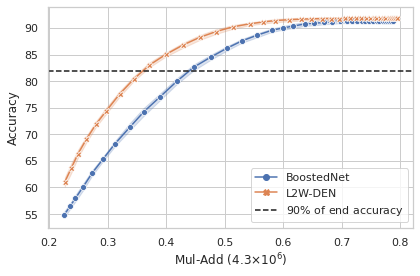

In [103]:
sns.set(font_scale=1.5) 
sns.set_theme(style="whitegrid")
#print(filtered_our_df)
combined_df = pd.concat([filtered_boosted_df, filtered_weighted_df, filtered_our_df],axis=0, ignore_index=True)
sns.lineplot(data=combined_df, x="average_IC", y="ACC", hue="method", style="method",
    markers=True, dashes=False)
plt.axhline(y=line_acc, color='k',linestyle='--', label=line_acc_label)
plt.legend()
x_string = r'Mul-Add ('+str(total_mudaa)+'$ \\times 10^6$)'
plt.xlabel(x_string)
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig('perf_cost_'+dataset+'.pdf')

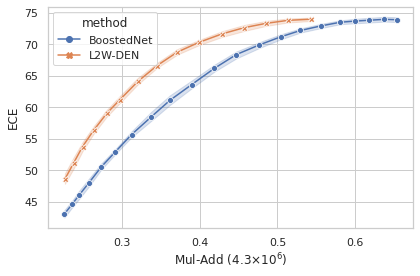

In [78]:
sns.set(font_scale=1.5) 
sns.set_theme(style="whitegrid")
sns.lineplot(data=combined_df, x="average_IC", y="ECE", hue="method", style="method",
    markers=True, dashes=False)
# sns.set_theme(style="whitegrid")
# sns.lineplot(data=filtered_weighted_df, x="average_ACC", y="ECE", label=boo_name)
# sns.lineplot(data=filtered_boosted_df, x="average_ACC", y="ECE", label=w_name)

# sns.lineplot(data=filtered_our_df, x="average_ACC", y="ECE", label=our_name)
x_string = r'Mul-Add ('+str(total_mudaa)+'$ \\times 10^6$)'
plt.xlabel(x_string)
plt.ylabel('ECE')
plt.tight_layout()
plt.savefig('perf_ece_'+dataset+'.pdf')

/home/floregol/miniconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/floregol/miniconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


<AxesSubplot:xlabel='average_IC'>

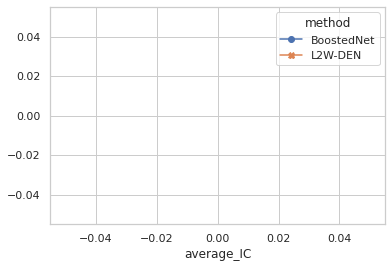

In [48]:
# sns.set(font_scale=1.5)  # crazy big
# sns.set_theme(style="whitegrid")

sns.set(font_scale=1.5) 
sns.set_theme(style="whitegrid")
sns.lineplot(data=combined_df, x="average_IC", y="C", hue="method", style="method",
    markers=True, dashes=False)

# sns.scatterplot(data=filtered_boosted_df, x="average_IC", y="C", label=boo_name)
# sns.scatterplot(data=filtered_weighted_df, x="average_IC", y="C", label=w_name)
# sns.scatterplot(data=filtered_our_df, x="average_IC", y="C", label=our_name)


# plt.xlabel(r'Mul-Add ($\times 10^6$)')
# plt.ylabel(r'$|\mathcal{\bar{C}}|$')
# plt.tight_layout()
# plt.savefig('inef_IC_'+dataset+'.pdf')


In [423]:
weighted_df_emp_vs_req = pd.DataFrame()
boosted_df_emp_vs_req = pd.DataFrame()
our_df_emp_vs_req = pd.DataFrame()
for cov_key in cov_keys_baseline:
    print(cov_key)
    alpha = float(cov_key.split('alpha_')[-1])
    boosted_df_cov = pd.DataFrame()
    boosted_df_cov['emp_alpha'] = boosted_df[cov_key]
    boosted_df_cov['requested_alpha'] = alpha
    boosted_df_emp_vs_req = pd.concat([boosted_df_cov, boosted_df_emp_vs_req],axis=0, ignore_index=True)

    df_cov = pd.DataFrame()
    df_cov['emp_alpha'] = weighted_df[cov_key]
    df_cov['requested_alpha'] = alpha
    weighted_df_emp_vs_req = pd.concat([df_cov, weighted_df_emp_vs_req],axis=0, ignore_index=True)

    df_cov = pd.DataFrame()
    df_cov['emp_alpha'] = our_df[cov_key]
    df_cov['requested_alpha'] = alpha
    our_df_emp_vs_req = pd.concat([df_cov, our_df_emp_vs_req],axis=0, ignore_index=True)
    

test/sets_gated_emp_alpha_0.01
test/sets_gated_emp_alpha_0.015
test/sets_gated_emp_alpha_0.02
test/sets_gated_emp_alpha_0.025
test/sets_gated_emp_alpha_0.03
test/sets_gated_emp_alpha_0.035
test/sets_gated_emp_alpha_0.04
test/sets_gated_emp_alpha_0.045
test/sets_gated_emp_alpha_0.05


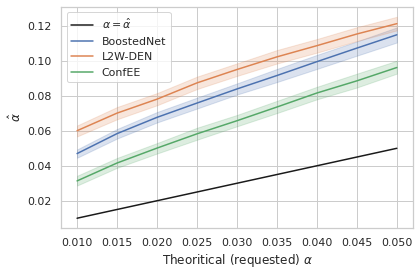

In [424]:
x = [0.01,0.05]
y = [0.01,0.05]
sns.set_theme(style="whitegrid")
plt.plot(x,y, color='k',label=r'$\alpha = \hat{\alpha}$')
sns.lineplot(data=boosted_df_emp_vs_req, x="requested_alpha", y="emp_alpha", label=boo_name)
sns.lineplot(data=weighted_df_emp_vs_req, x="requested_alpha", y="emp_alpha", label=w_name)
sns.lineplot(data=our_df_emp_vs_req, x="requested_alpha", y="emp_alpha", label=our_name)

plt.xlabel(r'Theoritical (requested) $\alpha$')
plt.ylabel(r' $\hat{\alpha}$')
plt.tight_layout()
plt.savefig('emp_vs_theoritical_'+dataset+'.pdf')

In [425]:
def plotting_point(point,metrics, w_metrics, prefix):
    df_acc_ours = pd.DataFrame()
    for l in range(L):

        all_acc = 'test/acc'+str(l)

        gated_acc = 'test/gated_acc_'+str(l)
        percent_exit = 'test/percent_exit'+str(l)
        if gated_acc in point and len(point[gated_acc]) == 10:

            df_acc = pd.DataFrame()

            df_acc['gated'] = point[gated_acc]
            df_acc['all'] = point[all_acc]
            df_acc['gate'] = l
            percent_exit = point[percent_exit]

            df_acc['fraction exit'] = np.mean([100*p for p in percent_exit])
            df_acc_ours = pd.concat([df_acc_ours, df_acc],axis=0, ignore_index=True)

    df_acc_ours['method'] = 'ConFEE'

    df_acc_boosted = pd.DataFrame()

    for l in range(L):
        all_acc = 'ALL_ACC_PER_GATE_'+str(l)
        gated_acc = 'GATED_ACC_PER_GATE_'+str(l)
        num_exit = 'EXIT_RATE_PER_GATE_'+str(l)
        if gated_acc in metrics:
            df_acc = pd.DataFrame()
            df_acc['gated'] = metrics[gated_acc]
            df_acc['all'] = metrics[all_acc]
            df_acc['gate'] = l
            df_acc['fraction exit'] = np.mean(metrics[num_exit])
            df_acc_boosted = pd.concat([df_acc_boosted, df_acc],axis=0, ignore_index=True)
    df_acc_boosted['method'] = boo_name      

    df_acc_weighted = pd.DataFrame()

    for l in range(L):
        all_acc = 'ALL_ACC_PER_GATE_'+str(l)
        gated_acc = 'GATED_ACC_PER_GATE_'+str(l)
        num_exit = 'EXIT_RATE_PER_GATE_'+str(l)
        if gated_acc in w_metrics:
            df_acc = pd.DataFrame()
            df_acc['gated'] = w_metrics[gated_acc]
            df_acc['all'] = w_metrics[all_acc]
            df_acc['gate'] = l
            df_acc['fraction exit'] = np.mean(w_metrics[num_exit])
            df_acc_weighted = pd.concat([df_acc_weighted, df_acc],axis=0, ignore_index=True)

    df_acc_weighted['method'] = w_name

    df_acc =  pd.concat([df_acc_boosted, df_acc_ours, df_acc_weighted],axis=0, ignore_index=True)
    
    sns.set(font_scale=1.3) 
    sns.set_theme(style="whitegrid")

    g = sns.relplot(
        data=df_acc,
        x="gate", y="gated", hue='method', label="gated acc", size="fraction exit",
         sizes=(10, 200))
    g.despine(left=True, bottom=True)
    g.set(xlabel ="Gate", ylabel = "Accuracy on exited points")
    g._legend.remove()
    plt.tight_layout()
    
    plt.savefig(prefix+'_'+dataset+'gated_acc.pdf')
    sns.set(font_scale=1.3) 
    sns.set_theme(style="whitegrid")
    g = sns.relplot(
        data=df_acc,
        x="gate", y="all", hue='method', label="gated acc", size="fraction exit",
         sizes=(10, 200))
    g.despine(left=True, bottom=True)
    g.set(xlabel ="Gate", ylabel = "Accuracy on all points")
    plt.tight_layout()
    plt.savefig(prefix+'_'+dataset+'all_acc.pdf')

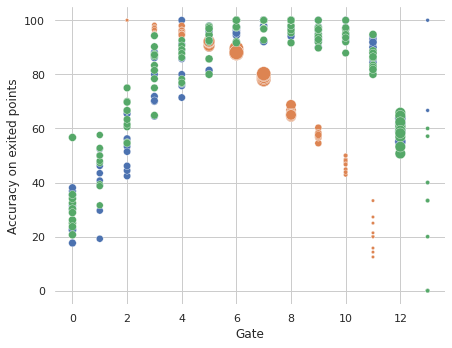

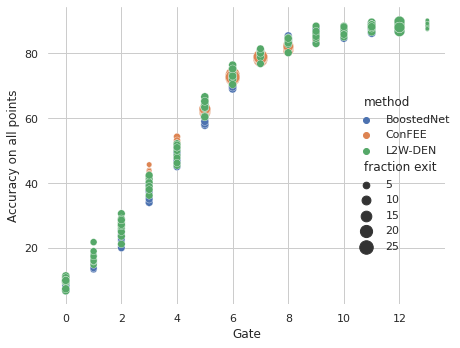

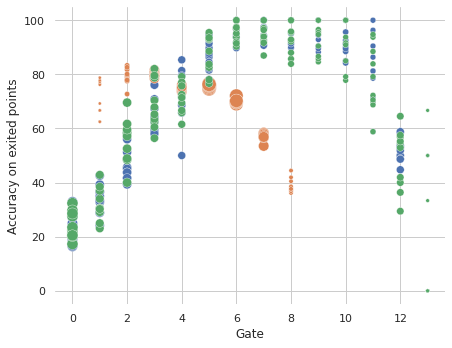

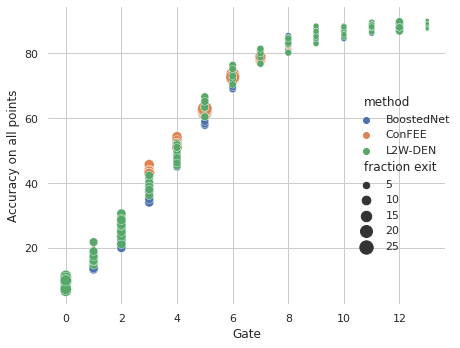

In [374]:
point = our_point_to_display
metrics = boosted_points[0]
w_metrics = weighted_points[0]
plotting_point(point,metrics, w_metrics,prefix='better' )
point = our_point2_to_display
metrics = boosted_points[1]
w_metrics = weighted_points[1]
plotting_point(point,metrics, w_metrics,prefix='worst' )